<a href="https://colab.research.google.com/github/Arjun-P-Dinesh/2348506_Lab8/blob/main/2348506_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("spam.csv")

In [7]:
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [9]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


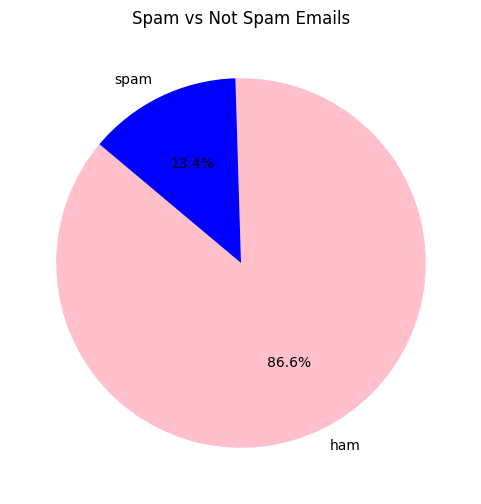

In [10]:
spam_counts = data['Category'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(spam_counts, labels=spam_counts.index, autopct='%1.1f%%', startangle=140,colors=['pink','blue'])
plt.title('Spam vs Not Spam Emails')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

X = data['Message']
y = data['Category'].apply(lambda x: 1 if x == 'spam' else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)
alpha = 1.0  # Laplace smoothing parameter
model = MultinomialNB(alpha=alpha)
model.fit(X_train_transformed, y_train)

MultinomialNB()